In [1]:
!date

Tue Dec  1 17:51:16 PST 2020


# Compare sex ratio

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import anndata
from matplotlib.patches import Ellipse, Circle

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

def nd(arr):
    return np.asarray(arr).reshape(-1)

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/dexpress')
from dexpress import dexpress, utils, plot

sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [103]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 PT" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
}

# add number of cells to this dataframe

In [168]:
ten = pd.read_csv("../../data/notebook/revision/10x_subclass_sex_ratio.csv", index_col=0)
ss = pd.read_csv("../../data/notebook/revision/smartseq_subclass_sex_ratio.csv", index_col=0)

both = np.intersect1d(ten.index.values, ss.index.values)

both = np.setdiff1d(both, "Low Quality")

x = ten.loc[both]["norm_F"]
y = ss.loc[both]["norm_F"]

x.var()
y.var()

0.020366937322921736

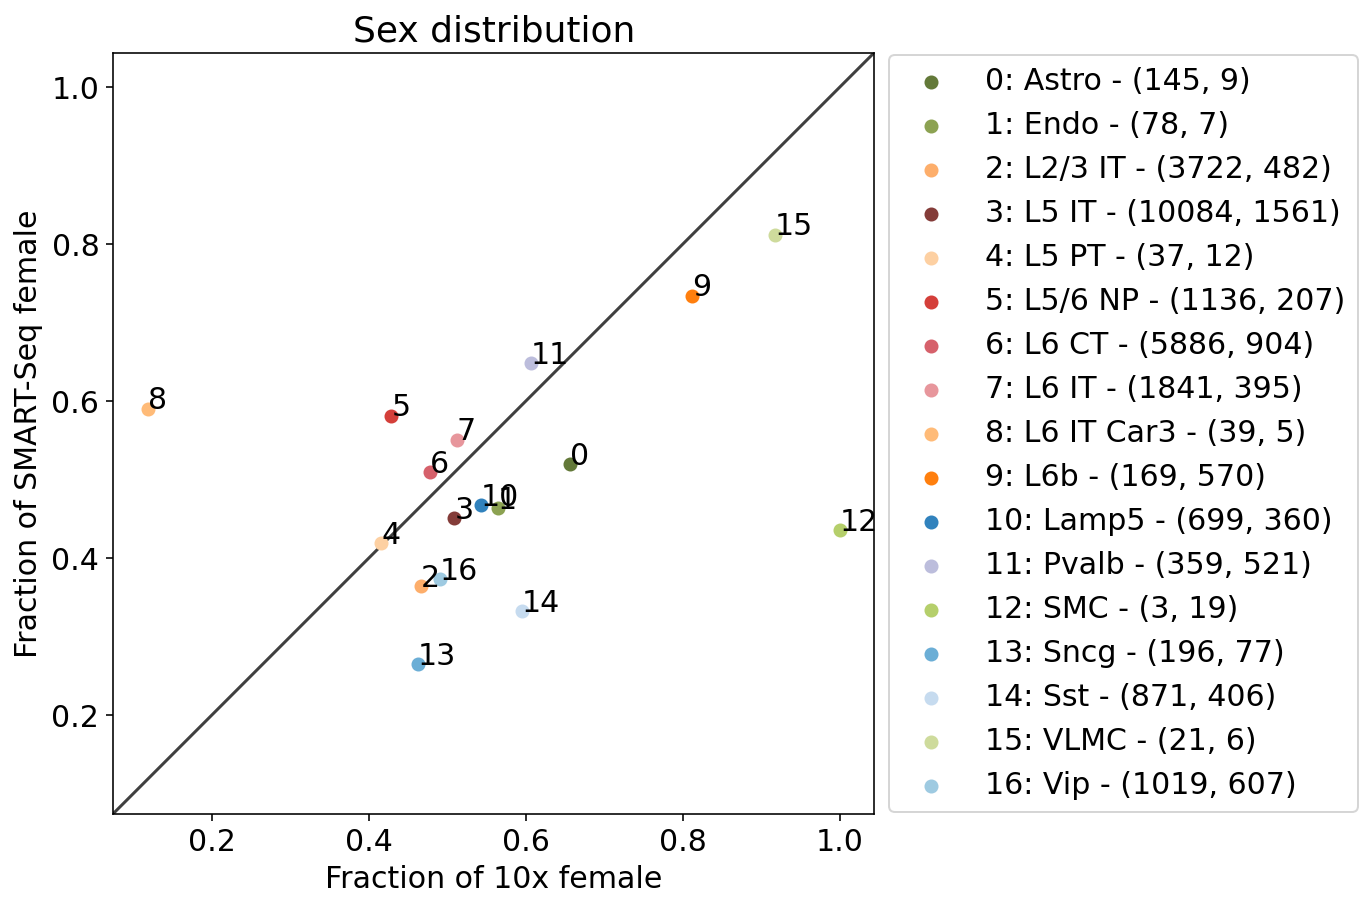

In [169]:
fig, ax = plt.subplots(figsize=(7,7))

for idx, (xx, yy) in enumerate(zip(x, y)):
    ax.scatter(xx, yy, color=cluster_cmap[both[idx]], label=f"{idx}: {both[idx]} - {int(ten.loc[both[idx]]['n']), int(ss.loc[both[idx]]['n'])}")
    ax.annotate(idx, (xx, yy)) 
#ax.add_artist(Ellipse((.5, .5), 2*np.sqrt(x.var()),2*np.sqrt(y.var()), color="red", alpha=0.1, zorder=-1))
yex(ax) 
ax.legend(bbox_to_anchor=(1, 0.5), loc="center left")
ax.set(**{
    "xlabel": "Fraction of 10x female",
    "ylabel": "Fraction of SMART-Seq female",
    "title": "Sex distribution"
})

plt.savefig(trackfig("../../figures/sex_distribution_10x_smartseq_cmp.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)


fig.show()

In [170]:
t = pd.read_csv("../../data/notebook/revision/gene_subclass_value_counts.csv", index_col=0)
s = pd.read_csv("../../data/notebook/revision/smartseq_subclass_value_counts.csv", index_col=0)

both = np.intersect1d(t.index.values, s.index.values)

both = np.setdiff1d(both, "Low Quality")

x = nd(t.loc[both]["fraction"].values)
y = nd(s.loc[both]["fraction"].values)

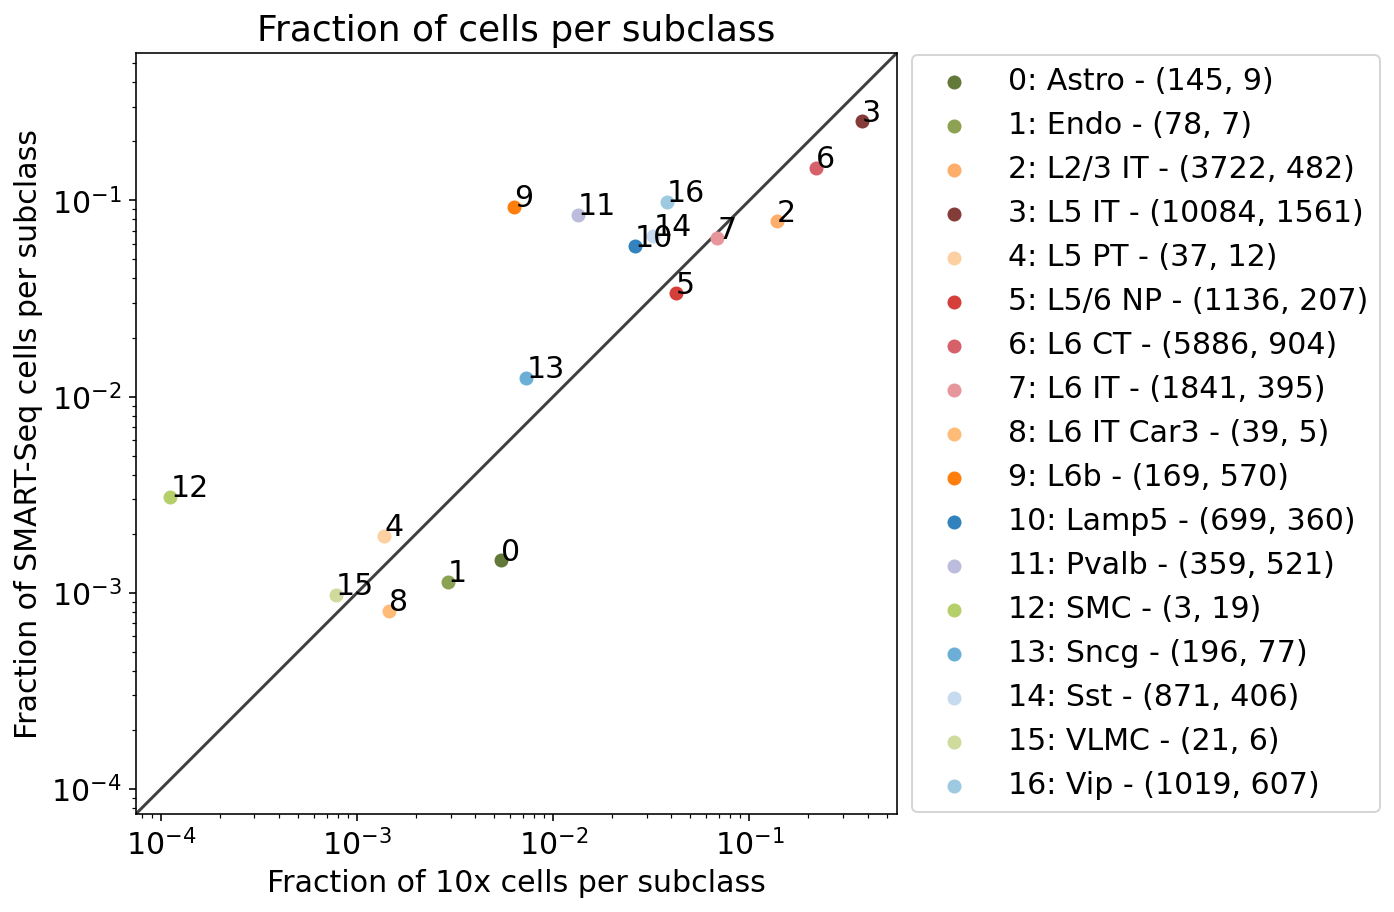

In [171]:
fig, ax = plt.subplots(figsize=(7,7))

for idx, (xx, yy) in enumerate(zip(x, y)):
    ax.scatter(xx, yy, color=cluster_cmap[both[idx]], label=f"{idx}: {both[idx]} - {int(t.loc[both[idx]]['n']), int(s.loc[both[idx]]['n'])}")
    ax.annotate(idx, (xx, yy)) 
#ax.add_artist(Circle((.5, .5), 0.25, fill=False))

ax.legend(bbox_to_anchor=(1, 0.5), loc="center left")
ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Fraction of 10x cells per subclass",
    "ylabel": "Fraction of SMART-Seq cells per subclass",
    "title": "Fraction of cells per subclass"
})

yex(ax) 

plt.savefig(trackfig("../../figures/subclass_distribution_10x_smartseq_cmp.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)


fig.show()